In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
get_path = 'drive/MyDrive/Skip-GNN/eval_matrices_plt/'
mat_path = 'drive/MyDrive/Skip-GNN/data/eval_matrices/eval_matrix_'

In [4]:
# mtd = 'node2vec_w' ## node2vec with weights
mtd = 'node2vec_all' ## _ denotes the negative dataset used

In [5]:
eval_arr = [[0.8994140625, 0.8615984405458089, 0.9373776908023483, 0.9324894514767933, 0.8956433637284701, 0.9563902145012455, 0.9533375223238095],
            [0.8759765625, 0.7795275590551181, 0.9709302325581395, 0.9635036496350365, 0.8618063112078346, 0.9358977293535982, 0.9356825647770378],
            [0.7265625, 0.4666666666666667, 0.9844357976653697, 0.967479674796748, 0.6296296296296297, 0.9390478370336461, 0.945423072862603],
            [0.890625, 0.8070866141732284, 0.9728682170542635, 0.9669811320754716, 0.8798283261802575, 0.9637352743697735, 0.9639163738939728],
            [0.83984375, 0.694980694980695, 0.9881422924901185, 0.9836065573770492, 0.8144796380090498, 0.9561516626734018, 0.9629000025545832]]

In [ ]:
## Read from folder
# eval_arr = np.load(mat_path + mtd + '.npy')

In [6]:
## Init arrays
acc = []
sen = []
spec = []
pre = []
f1 = []
roc = []
pr = []

In [7]:
## 5-fold cross validation
for i in range(0, 5):
    ## Append
    acc.append(eval_arr[i][0])
    sen.append(eval_arr[i][1])
    spec.append(eval_arr[i][2])
    pre.append(eval_arr[i][3])
    f1.append(eval_arr[i][4])
    roc.append(eval_arr[i][5])
    pr.append(eval_arr[i][6])

In [8]:
## Mean, Max and Min

## define method to calculate Mean
def Average(lst):
    return sum(lst) / len(lst)

print(mtd)

acc_avg = Average(acc)
recall_avg = Average(sen) ## Sensitivity
spec_avg = Average(spec)
pre_avg = Average(pre)
f1_avg = Average(f1)
roc_avg = Average(roc)
pr_avg = Average(pr)

print(str(round(acc_avg, 4)), str(round(recall_avg, 4)), str(round(spec_avg, 4)), str(round(pre_avg, 4)), str(round(f1_avg, 4)), 
      str(round(roc_avg, 4)), str(round(pr_avg, 4)))

## Find Min and Max
acc_max = max(acc)
recall_max = max(sen)
spec_max = max(spec)
pre_max = max(pre)
f1_max = max(f1)
roc_max = max(roc)
pr_max = max(pr)
print(str(round(acc_max, 4)), str(round(recall_max, 4)), str(round(spec_max, 4)), str(round(pre_max, 4)), str(round(f1_max, 4)), 
      str(round(roc_max, 4)), str(round(pr_max, 4)))

acc_min = min(acc)
recall_min = min(sen)
spec_min = min(spec)
pre_min = min(pre)
f1_min = min(f1)
roc_min = min(roc)
pr_min = min(pr)
print(str(round(acc_min, 4)), str(round(recall_min, 4)), str(round(spec_min, 4)), str(round(pre_min, 4)), str(round(f1_min, 4)), 
      str(round(roc_min, 4)), str(round(pr_min, 4)))

node2vec_all
0.8465 0.722 0.9708 0.9628 0.8163 0.9502 0.9523
0.8994 0.8616 0.9881 0.9836 0.8956 0.9637 0.9639
0.7266 0.4667 0.9374 0.9325 0.6296 0.9359 0.9357


[1 3 5 7 9] <a list of 5 Text major ticklabel objects>
---Plot Saved---


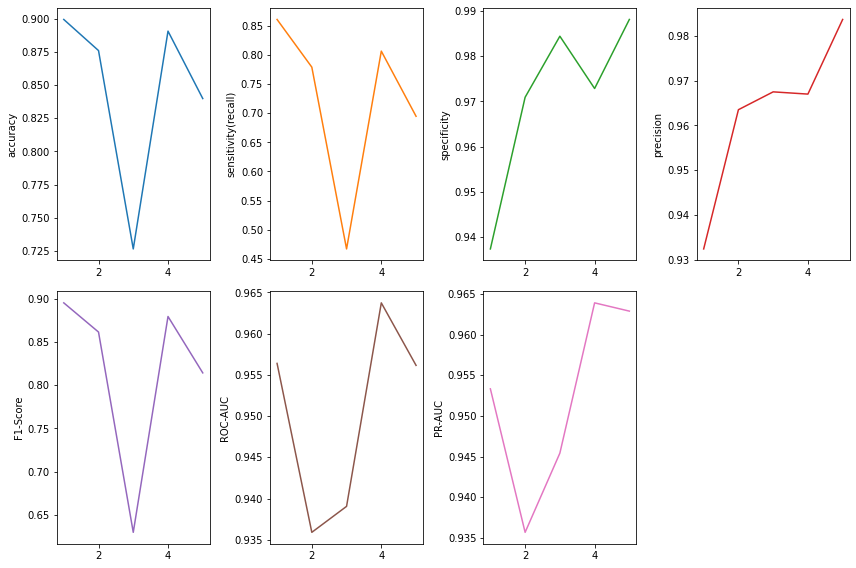

In [9]:
## Plot
plt.rcParams["figure.figsize"] = (12, 8)

fig, axs = plt.subplots(2, 4)
plt.setp(axs, xticks=[1, 3, 5, 7, 9], xticklabels=['2', '4', '6', '8', '10']) ## xticks starts from 0 (i.e. xticklabels 1)

locs, labels = plt.xticks()  # Get the current locations and labels.
print(locs, labels)

axs[0, 0].plot(acc)
axs[0, 0].set(ylabel='accuracy')

axs[0, 1].plot(sen, 'tab:orange')
axs[0, 1].set(ylabel='sensitivity(recall)')

axs[0, 2].plot(spec, 'tab:green')
axs[0, 2].set(ylabel='specificity')

axs[0, 3].plot(pre, 'tab:red')
axs[0, 3].set(ylabel='precision')

axs[1, 0].plot(f1, 'tab:purple')
axs[1, 0].set(ylabel='F1-Score')

axs[1, 1].plot(roc, 'tab:brown')
axs[1, 1].set(ylabel='ROC-AUC')

axs[1, 2].plot(pr, 'tab:pink')
axs[1, 2].set(ylabel='PR-AUC')

## To-do: axs[1,3] how to hide??
fig.delaxes(axs[1,3])

fig.tight_layout()

plt.savefig(get_path + mtd + '.png')
print('---Plot Saved---')